In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])
df.head()

,Elevation,Aspect,Slope,Hillshade_Morning,Hillshade_Afternoon,Hillshade_Evening,Distance_To_River,Distance_From_Road,Distance_From_Pollutant,Sector,Soil,Plant_species
0,3251,35,10,219,218,134,30,3263,2837,2,36,1
1,3511,12,11,209,217,145,531,1385,1871,1,37,1
2,2335,63,20,233,194,83,234,1120,726,3,8,0
3,3244,48,14,224,209,116,67,1645,907,2,36,1
4,2242,292,34,108,211,233,95,808,684,3,8,3


In [235]:
X = df.drop('Plant_species',axis=1)
y = df['Plant_species']
test_X = df1
X=(X-X.min())/(X.max()-X.min())
test_X=(test_X-test_X.min())/(test_X.max()-test_X.min())



In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=4)



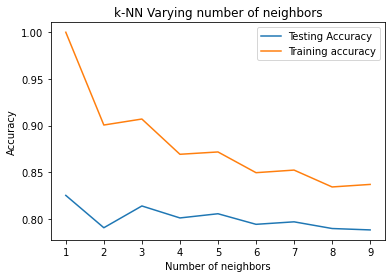

In [237]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


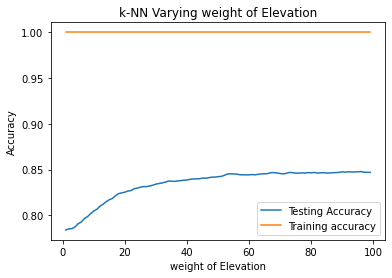

[96]
0.8478333333333333


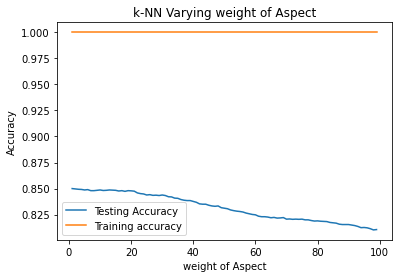

[1]
0.85


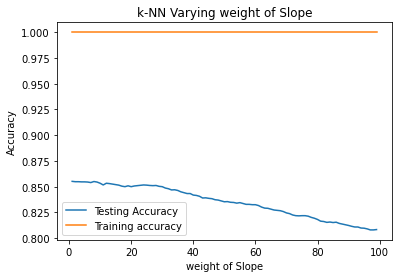

[1]
0.8551666666666666


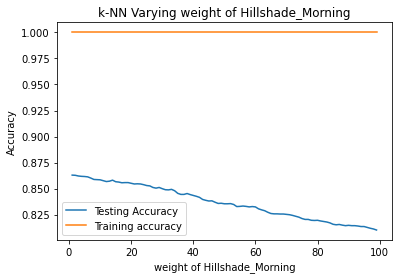

[1]
0.863


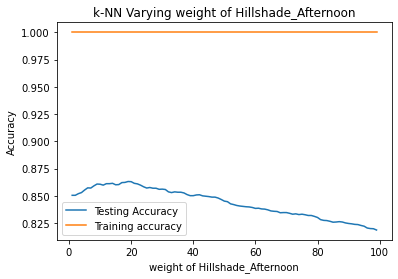

[19]
0.8631666666666666


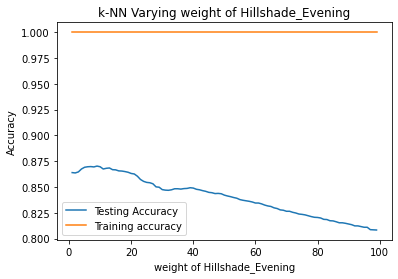

[9]
0.8703333333333333


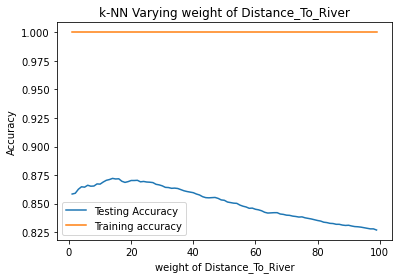

[14]
0.8721666666666666


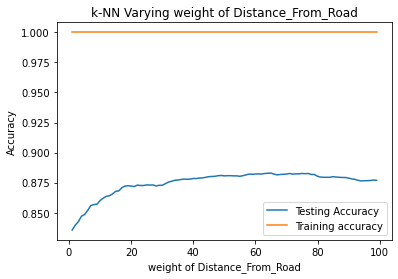

[65]
0.883


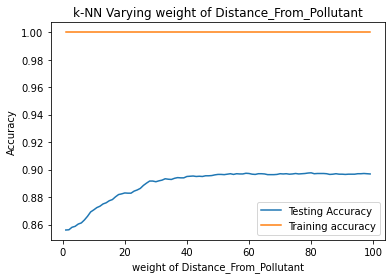

[80]
0.8976666666666666


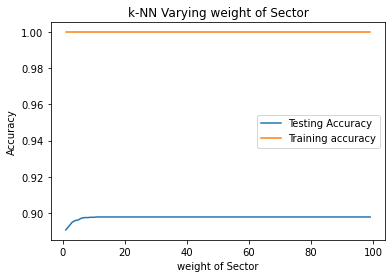

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
0.8976666666666666


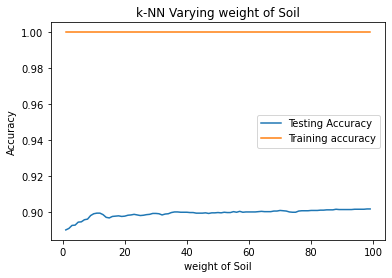

[98, 99]
0.9016666666666666


In [238]:
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
lst = []
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1,
                     weights='uniform')

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Elevation'] = X_train['Elevation']*k*0.05
    X_test_final['Elevation'] = X_test['Elevation']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Elevation')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Elevation')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Elevation']=X_train['Elevation']*max_index[0]*0.05
X_test['Elevation']=X_test['Elevation']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Aspect'] = X_train['Aspect']*k*0.05
    X_test_final['Aspect'] = X_test['Aspect']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Aspect')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Aspect')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Aspect']=X_train['Aspect']*max_index[0]*0.05
X_test['Aspect']=X_test['Aspect']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Slope'] = X_train['Slope']*k*0.05
    X_test_final['Slope'] = X_test['Slope']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Slope')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Slope')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Slope']=X_train['Slope']*max_index[0]*0.05
X_test['Slope']=X_test['Slope']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Morning'] = X_train['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Morning'] = X_test['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Morning')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Morning')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Morning']=X_train['Hillshade_Morning']*max_index[0]*0.05
X_test['Hillshade_Morning']=X_test['Hillshade_Morning']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Afternoon'] = X_train['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Afternoon'] = X_test['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Afternoon')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Afternoon')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Afternoon']=X_train['Hillshade_Afternoon']*max_index[0]*0.05
X_test['Hillshade_Afternoon']=X_test['Hillshade_Afternoon']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Evening'] = X_train['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Evening'] = X_test['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Evening')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Evening')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Evening']=X_train['Hillshade_Evening']*max_index[0]*0.05
X_test['Hillshade_Evening']=X_test['Hillshade_Evening']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_To_River'] = X_train['Distance_To_River'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_To_River'] = X_test['Distance_To_River'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_To_River')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_To_River')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_To_River']=X_train['Distance_To_River']*max_index[0]*0.05
X_test['Distance_To_River']=X_test['Distance_To_River']*max_index[0]*0.05




for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Road'] = X_train['Distance_From_Road'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_From_Road'] = X_test['Distance_From_Road'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Road')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Road')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Road']=X_train['Distance_From_Road']*max_index[0]*0.05
X_test['Distance_From_Road']=X_test['Distance_From_Road']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Pollutant'] = X_train['Distance_From_Pollutant']*k*0.05
    X_test_final['Distance_From_Pollutant'] = X_test['Distance_From_Pollutant']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Pollutant')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Pollutant')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Pollutant']=X_train['Distance_From_Pollutant']*max_index[0]*0.05
X_test['Distance_From_Pollutant']=X_test['Distance_From_Pollutant']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Sector'] = X_train['Sector']*k*0.05
    X_test_final['Sector'] = X_test['Sector']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Sector')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Sector')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Sector']=X_train['Sector']*max_index[0]*0.05
X_test['Sector']=X_test['Sector']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Soil'] = X_train['Soil']*k*0.05
    X_test_final['Soil'] = X_test['Soil']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Soil')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Soil')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Soil']=X_train['Soil']*max_index[0]*0.05
X_test['Soil']=X_test['Soil']*max_index[0]*0.05





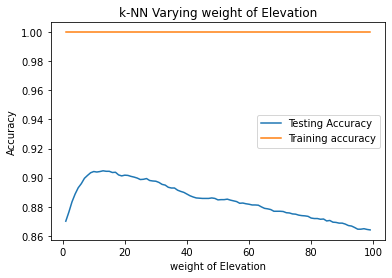

[13]
0.9046666666666666


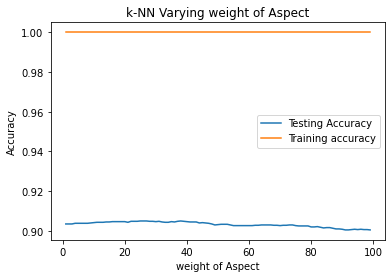

[25, 26, 27, 38]
0.905


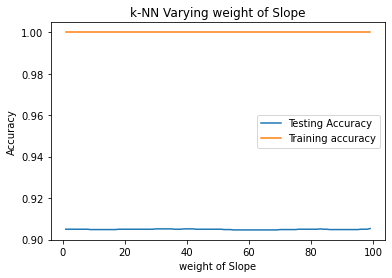

[99]
0.9053333333333333


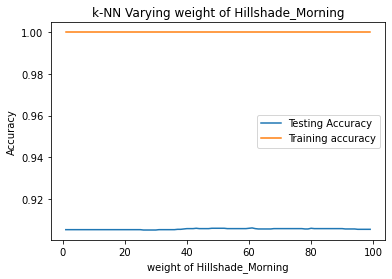

[61]
0.9061666666666667


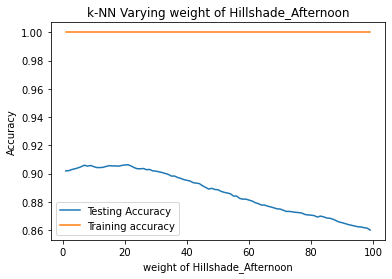

[21]
0.9063333333333333


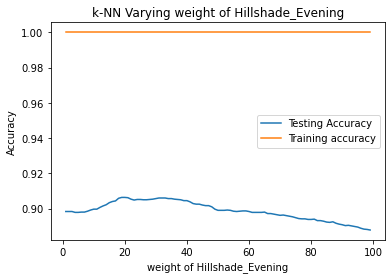

[19, 20]
0.9063333333333333


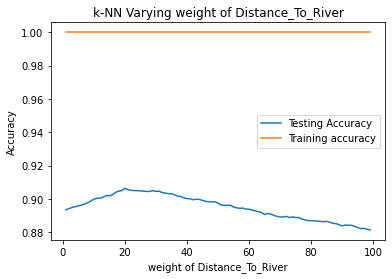

[20]
0.9063333333333333


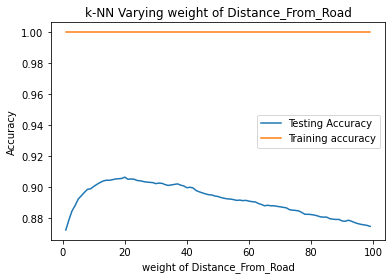

[20]
0.9063333333333333


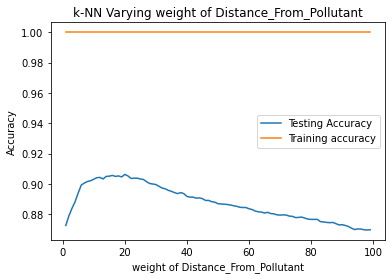

[20]
0.9063333333333333


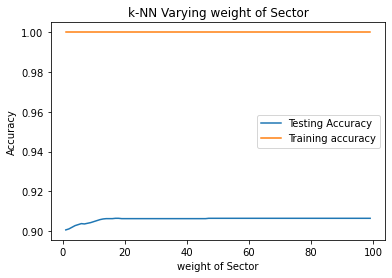

[17, 18, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
0.9065


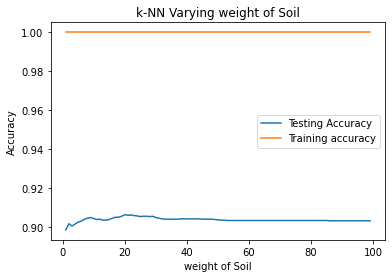

[20]
0.9065


In [239]:

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Elevation'] = X_train['Elevation']*k*0.05
    X_test_final['Elevation'] = X_test['Elevation']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Elevation')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Elevation')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Elevation']=X_train['Elevation']*max_index[0]*0.05
X_test['Elevation']=X_test['Elevation']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Aspect'] = X_train['Aspect']*k*0.05
    X_test_final['Aspect'] = X_test['Aspect']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Aspect')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Aspect')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Aspect']=X_train['Aspect']*max_index[0]*0.05
X_test['Aspect']=X_test['Aspect']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Slope'] = X_train['Slope']*k*0.05
    X_test_final['Slope'] = X_test['Slope']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Slope')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Slope')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Slope']=X_train['Slope']*max_index[0]*0.05
X_test['Slope']=X_test['Slope']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Morning'] = X_train['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Morning'] = X_test['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Morning')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Morning')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Morning']=X_train['Hillshade_Morning']*max_index[0]*0.05
X_test['Hillshade_Morning']=X_test['Hillshade_Morning']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Afternoon'] = X_train['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Afternoon'] = X_test['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Afternoon')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Afternoon')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Afternoon']=X_train['Hillshade_Afternoon']*max_index[0]*0.05
X_test['Hillshade_Afternoon']=X_test['Hillshade_Afternoon']*max_index[0]*0.05




for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Evening'] = X_train['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Evening'] = X_test['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Evening')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Evening')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Evening']=X_train['Hillshade_Evening']*max_index[0]*0.05
X_test['Hillshade_Evening']=X_test['Hillshade_Evening']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_To_River'] = X_train['Distance_To_River'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_To_River'] = X_test['Distance_To_River'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_To_River')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_To_River')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_To_River']=X_train['Distance_To_River']*max_index[0]*0.05
X_test['Distance_To_River']=X_test['Distance_To_River']*max_index[0]*0.05




for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Road'] = X_train['Distance_From_Road'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_From_Road'] = X_test['Distance_From_Road'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Road')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Road')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Road']=X_train['Distance_From_Road']*max_index[0]*0.05
X_test['Distance_From_Road']=X_test['Distance_From_Road']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Pollutant'] = X_train['Distance_From_Pollutant']*k*0.05
    X_test_final['Distance_From_Pollutant'] = X_test['Distance_From_Pollutant']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Pollutant')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Pollutant')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Pollutant']=X_train['Distance_From_Pollutant']*max_index[0]*0.05
X_test['Distance_From_Pollutant']=X_test['Distance_From_Pollutant']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Sector'] = X_train['Sector']*k*0.05
    X_test_final['Sector'] = X_test['Sector']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Sector')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Sector')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Sector']=X_train['Sector']*max_index[0]*0.05
X_test['Sector']=X_test['Sector']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Soil'] = X_train['Soil']*k*0.05
    X_test_final['Soil'] = X_test['Soil']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Soil')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Soil')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Soil']=X_train['Soil']*max_index[0]*0.05
X_test['Soil']=X_test['Soil']*max_index[0]*0.05




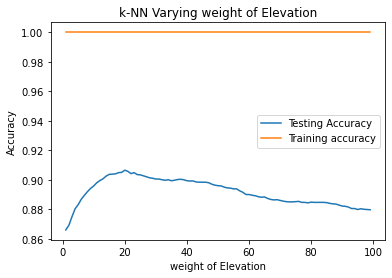

[20]
0.9065


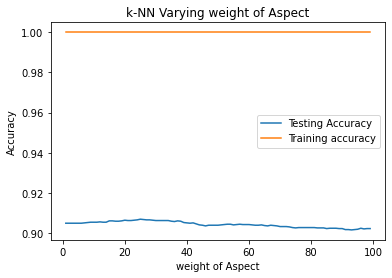

[25]
0.907


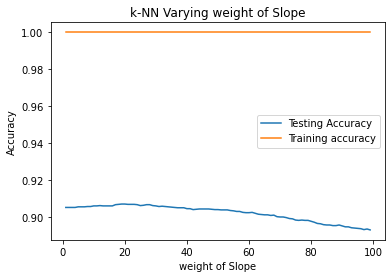

[19, 20]
0.907


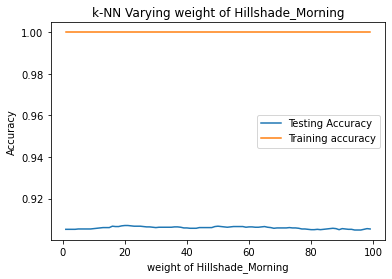

[20, 21]
0.907


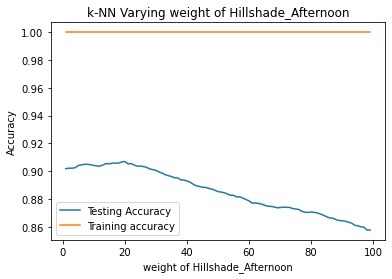

[20]
0.907


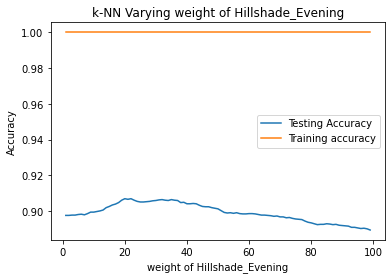

[20, 22]
0.907


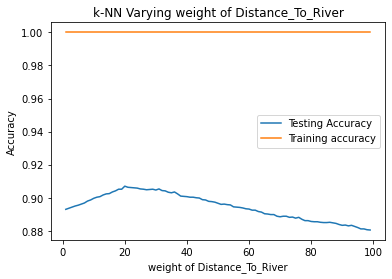

[20]
0.907


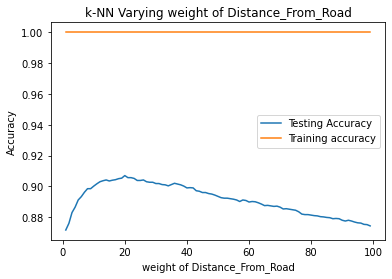

[20]
0.907


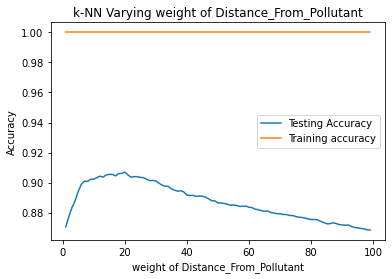

[20]
0.907


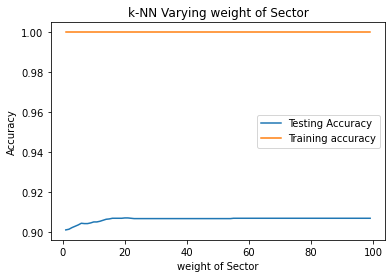

[20, 21]
0.907


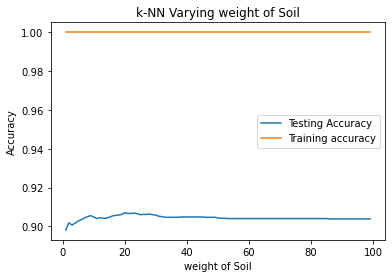

[20]
0.907


In [240]:


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Elevation'] = X_train['Elevation']*k*0.05
    X_test_final['Elevation'] = X_test['Elevation']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Elevation')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Elevation')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Elevation']=X_train['Elevation']*max_index[0]*0.05
X_test['Elevation']=X_test['Elevation']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Aspect'] = X_train['Aspect']*k*0.05
    X_test_final['Aspect'] = X_test['Aspect']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Aspect')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Aspect')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Aspect']=X_train['Aspect']*max_index[0]*0.05
X_test['Aspect']=X_test['Aspect']*max_index[0]*0.05

for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Slope'] = X_train['Slope']*k*0.05
    X_test_final['Slope'] = X_test['Slope']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Slope')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Slope')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Slope']=X_train['Slope']*max_index[0]*0.05
X_test['Slope']=X_test['Slope']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Morning'] = X_train['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Morning'] = X_test['Hillshade_Morning'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Morning')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Morning')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Morning']=X_train['Hillshade_Morning']*max_index[0]*0.05
X_test['Hillshade_Morning']=X_test['Hillshade_Morning']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Afternoon'] = X_train['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Afternoon'] = X_test['Hillshade_Afternoon'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Afternoon')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Afternoon')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Afternoon']=X_train['Hillshade_Afternoon']*max_index[0]*0.05
X_test['Hillshade_Afternoon']=X_test['Hillshade_Afternoon']*max_index[0]*0.05




for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Hillshade_Evening'] = X_train['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    X_test_final['Hillshade_Evening'] = X_test['Hillshade_Evening'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Hillshade_Evening')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Hillshade_Evening')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Hillshade_Evening']=X_train['Hillshade_Evening']*max_index[0]*0.05
X_test['Hillshade_Evening']=X_test['Hillshade_Evening']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_To_River'] = X_train['Distance_To_River'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_To_River'] = X_test['Distance_To_River'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_To_River')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_To_River')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_To_River']=X_train['Distance_To_River']*max_index[0]*0.05
X_test['Distance_To_River']=X_test['Distance_To_River']*max_index[0]*0.05




for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Road'] = X_train['Distance_From_Road'].apply(lambda x: x*k*0.05)
    X_test_final['Distance_From_Road'] = X_test['Distance_From_Road'].apply(lambda x: x*k*0.05)
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Road')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Road')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Road']=X_train['Distance_From_Road']*max_index[0]*0.05
X_test['Distance_From_Road']=X_test['Distance_From_Road']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Distance_From_Pollutant'] = X_train['Distance_From_Pollutant']*k*0.05
    X_test_final['Distance_From_Pollutant'] = X_test['Distance_From_Pollutant']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Distance_From_Pollutant')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Distance_From_Pollutant')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Distance_From_Pollutant']=X_train['Distance_From_Pollutant']*max_index[0]*0.05
X_test['Distance_From_Pollutant']=X_test['Distance_From_Pollutant']*max_index[0]*0.05


for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Sector'] = X_train['Sector']*k*0.05
    X_test_final['Sector'] = X_test['Sector']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Sector')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Sector')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Sector']=X_train['Sector']*max_index[0]*0.05
X_test['Sector']=X_test['Sector']*max_index[0]*0.05



for i,k in enumerate(neighbors):
    X_train_final = X_train.copy()
    X_test_final = X_test.copy()
    X_train_final['Soil'] = X_train['Soil']*k*0.05
    X_test_final['Soil'] = X_test['Soil']*k*0.05
    knn.fit(X_train_final, y_train)
    train_accuracy[i] = knn.score(X_train_final, y_train)
    test_accuracy[i] = knn.score(X_test_final, y_test) 

plt.title('k-NN Varying weight of Soil')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('weight of Soil')
plt.ylabel('Accuracy')
plt.show()
max_value = max(test_accuracy)
max_index = [index+1 for index, item in enumerate(test_accuracy) if item == max_value]
print(max_index)
print(max_value)
lst.append(max_index[0]) 
X_train['Soil']=X_train['Soil']*max_index[0]*0.05
X_test['Soil']=X_test['Soil']*max_index[0]*0.05




In [241]:
lst

[96,
 1,
 1,
 1,
 19,
 9,
 14,
 65,
 80,
 11,
 98,
 13,
 25,
 99,
 61,
 21,
 19,
 20,
 20,
 20,
 17,
 20,
 20,
 25,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20]

In [242]:
456/3

152.0

In [243]:
print(lst.__sizeof__())

360


In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('train_classification.csv')
df1 = pd.read_csv('test_classification.csv')
df['Sector'] = df['Sector'].map(lambda x: x.lstrip('Sector_'))
df['Soil'] = df['Soil'].map(lambda x: x.lstrip('Soil_'))
df1['Sector'] = df1['Sector'].map(lambda x: x.lstrip('Sector_'))
df1['Soil'] = df1['Soil'].map(lambda x: x.lstrip('Soil_'))
df['Sector'] = pd.to_numeric(df['Sector'])
df['Soil'] = pd.to_numeric(df['Soil'])
df1['Sector'] = pd.to_numeric(df1['Sector'])
df1['Soil'] = pd.to_numeric(df1['Soil'])

X = df.drop('Plant_species',axis=1)
y = df['Plant_species']
test_X = df1
X=(X-X.min())/(X.max()-X.min())
test_X=(test_X-test_X.min())/(test_X.max()-test_X.min())
#1

idx =0
X['Elevation']=X['Elevation']*lst[idx]*0.05
test_X['Elevation']=test_X['Elevation']*lst[idx]*0.05
idx=idx+1
X['Aspect']=X['Aspect']*lst[idx]*0.05
test_X['Aspect']=test_X['Aspect']*lst[idx]*0.05
idx=idx+1
X['Slope']=X['Slope']*lst[idx]*0.05
test_X['Slope']=test_X['Slope']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Morning']=X['Hillshade_Morning']*lst[idx]*0.05
test_X['Hillshade_Morning']=test_X['Hillshade_Morning']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Afternoon']=X['Hillshade_Afternoon']*lst[idx]*0.05
test_X['Hillshade_Afternoon']=test_X['Hillshade_Afternoon']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Evening']=X['Hillshade_Evening']*lst[idx]*0.05
test_X['Hillshade_Evening']=test_X['Hillshade_Evening']*lst[idx]*0.05
idx=idx+1
X['Distance_To_River']=X['Distance_To_River']*lst[idx]*0.05
test_X['Distance_To_River']=test_X['Distance_To_River']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Road']=X['Distance_From_Road']*lst[idx]*0.05
test_X['Distance_From_Road']=test_X['Distance_From_Road']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Pollutant']=X['Distance_From_Pollutant']*lst[idx]*0.05
test_X['Distance_From_Pollutant']=test_X['Distance_From_Pollutant']*lst[idx]*0.05
idx=idx+1
X['Sector']=X['Sector']*lst[idx]*0.05
test_X['Sector']=test_X['Sector']*lst[idx]*0.05
idx=idx+1
X['Soil']=X['Soil']*lst[idx]*0.05
test_X['Soil']=test_X['Soil']*lst[idx]*0.05
idx=idx+1


#2
X['Elevation']=X['Elevation']*lst[idx]*0.05
test_X['Elevation']=test_X['Elevation']*lst[idx]*0.05
idx=idx+1
X['Aspect']=X['Aspect']*lst[idx]*0.05
test_X['Aspect']=test_X['Aspect']*lst[idx]*0.05
idx=idx+1
X['Slope']=X['Slope']*lst[idx]*0.05
test_X['Slope']=test_X['Slope']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Morning']=X['Hillshade_Morning']*lst[idx]*0.05
test_X['Hillshade_Morning']=test_X['Hillshade_Morning']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Afternoon']=X['Hillshade_Afternoon']*lst[idx]*0.05
test_X['Hillshade_Afternoon']=test_X['Hillshade_Afternoon']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Evening']=X['Hillshade_Evening']*lst[idx]*0.05
test_X['Hillshade_Evening']=test_X['Hillshade_Evening']*lst[idx]*0.05
idx=idx+1
X['Distance_To_River']=X['Distance_To_River']*lst[idx]*0.05
test_X['Distance_To_River']=test_X['Distance_To_River']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Road']=X['Distance_From_Road']*lst[idx]*0.05
test_X['Distance_From_Road']=test_X['Distance_From_Road']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Pollutant']=X['Distance_From_Pollutant']*lst[idx]*0.05
test_X['Distance_From_Pollutant']=test_X['Distance_From_Pollutant']*lst[idx]*0.05
idx=idx+1
X['Sector']=X['Sector']*lst[idx]*0.05
test_X['Sector']=test_X['Sector']*lst[idx]*0.05
idx=idx+1
X['Soil']=X['Soil']*lst[idx]*0.05
test_X['Soil']=test_X['Soil']*lst[idx]*0.05
idx=idx+1

#3
X['Elevation']=X['Elevation']*lst[idx]*0.05
test_X['Elevation']=test_X['Elevation']*lst[idx]*0.05
idx=idx+1
X['Aspect']=X['Aspect']*lst[idx]*0.05
test_X['Aspect']=test_X['Aspect']*lst[idx]*0.05
idx=idx+1
X['Slope']=X['Slope']*lst[idx]*0.05
test_X['Slope']=test_X['Slope']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Morning']=X['Hillshade_Morning']*lst[idx]*0.05
test_X['Hillshade_Morning']=test_X['Hillshade_Morning']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Afternoon']=X['Hillshade_Afternoon']*lst[idx]*0.05
test_X['Hillshade_Afternoon']=test_X['Hillshade_Afternoon']*lst[idx]*0.05
idx=idx+1
X['Hillshade_Evening']=X['Hillshade_Evening']*lst[idx]*0.05
test_X['Hillshade_Evening']=test_X['Hillshade_Evening']*lst[idx]*0.05
idx=idx+1
X['Distance_To_River']=X['Distance_To_River']*lst[idx]*0.05
test_X['Distance_To_River']=test_X['Distance_To_River']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Road']=X['Distance_From_Road']*lst[idx]*0.05
test_X['Distance_From_Road']=test_X['Distance_From_Road']*lst[idx]*0.05
idx=idx+1
X['Distance_From_Pollutant']=X['Distance_From_Pollutant']*lst[idx]*0.05
test_X['Distance_From_Pollutant']=test_X['Distance_From_Pollutant']*lst[idx]*0.05
idx=idx+1
X['Sector']=X['Sector']*lst[idx]*0.05
test_X['Sector']=test_X['Sector']*lst[idx]*0.05
idx=idx+1
X['Soil']=X['Soil']*lst[idx]*0.05
test_X['Soil']=test_X['Soil']*lst[idx]*0.05
idx=idx+1



knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1,
                     weights='uniform')

ans_y = knn.fit(X,y).predict(test_X)
df = pd.DataFrame()
df['Id'] = df.index
df['Category']=pd.Series(ans_y)
df['Id'] = df.index
with open('csv_data.csv', 'w') as csv_file:
    df.to_csv(path_or_buf=csv_file,index=False)
